In [1]:
# import libraries
import os 
import re  
import pandas as pd

# We will use the following Scikit-Learn classes for the activity
from sklearn.metrics import confusion_matrix
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn import metrics

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
%matplotlib inline

In [3]:
# use nltk libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer as regextoken

In [4]:
from textblob import TextBlob
from autocorrect import spell
import wordsegment
from wordsegment import load, segment

In [5]:
# set directory
import os
 
os.getcwd()

'C:\\Users\\Sowmya\\Downloads\\DL_TM_Cute\\Cute_CSE7321c_Santosh_Yeleri'

In [6]:
os.chdir('C:\\Users\\Sowmya\\Downloads\\PHD\\Model_Practice')

In [7]:
pwd()

'C:\\Users\\Sowmya\\Downloads\\PHD\\Model_Practice'

In [8]:
#reading train data
GD_train = pd.read_csv('GrievancesData_Train.csv')

In [9]:
GD_train.head()

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution
0,GID512411,Bank5279,State31,2016-01-19,Settlement process and costs,"Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...",Mortgage,Closed with explanation,No,2016-01-30
1,GID512412,Bank5287,State26,2016-01-19,"Application, originator, mortgage broker",I had a mortgage with from XXXX of XXXX to XX...,Mortgage,Closed with explanation,Yes,2016-02-10
2,GID512413,Bank5286,State14,2016-01-19,Billing disputes,"In XXXX XXXX, I was given a {$1100.00} credit...",Credit card,Closed with monetary relief,Yes,2016-02-10
3,GID512415,Bank5279,State53,2016-01-19,"Loan servicing, payments, escrow account",Our Mortgage was sold to Bank5279 in XXXX of ...,Mortgage,Closed with explanation,No,2016-01-30
4,GID512417,Bank5286,State37,2016-01-19,"Loan modification,collection,foreclosure",We started dealing with Citi Mortgage back in...,Mortgage,Closed with explanation,No,2016-01-30


In [10]:
GD_train_Text = GD_train[["GrievanceDescription","Disputed"]]


In [11]:
GD_train_Text.head(10)

,GrievanceDescription,Disputed
0,"Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...",No
1,I had a mortgage with from XXXX of XXXX to XX...,Yes
2,"In XXXX XXXX, I was given a {$1100.00} credit...",Yes
3,Our Mortgage was sold to Bank5279 in XXXX of ...,No
4,We started dealing with Citi Mortgage back in...,No
5,Trouble with how payments are handled My husba...,No
6,"TOO BIG TO FAIL AND CARE We are in our XXXX, ...",Yes
7,I have a car loan with Bank5397. In XXXX of 2...,No
8,Ocwen loan servicing is the servicer of my lo...,Yes
9,We are trying to close a new Mortgage we have...,No


In [12]:
init_notebook_mode(connected=True)

In [13]:
GD_train_Text.Disputed.value_counts()

No     41895
Yes    11785
Name: Disputed, dtype: int64

In [14]:
GD_train_Text.dtypes

GrievanceDescription    object
Disputed                object
dtype: object

In [15]:
GD_train_Text.isnull().sum()

GrievanceDescription    0
Disputed                0
dtype: int64

In [16]:

GD_train_Text.Disputed

0         No
1        Yes
2        Yes
3         No
4         No
5         No
6        Yes
7         No
8        Yes
9         No
10       Yes
11        No
12       Yes
13        No
14       Yes
15       Yes
16        No
17        No
18        No
19       Yes
20       Yes
21       Yes
22        No
23       Yes
24        No
25        No
26        No
27        No
28       Yes
29        No
        ... 
53650     No
53651     No
53652     No
53653     No
53654     No
53655     No
53656     No
53657     No
53658     No
53659     No
53660     No
53661     No
53662     No
53663     No
53664     No
53665     No
53666     No
53667     No
53668     No
53669     No
53670     No
53671     No
53672     No
53673     No
53674     No
53675     No
53676     No
53677     No
53678     No
53679     No
Name: Disputed, Length: 53680, dtype: object

In [17]:
GD_train_Text.Disputed = GD_train_Text.Disputed.replace('No',0)


In [18]:
GD_train_Text.Disputed = GD_train_Text.Disputed.replace('Yes',1)

In [19]:
GD_train_Text.Disputed

0        0
1        1
2        1
3        0
4        0
5        0
6        1
7        0
8        1
9        0
10       1
11       0
12       1
13       0
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       1
22       0
23       1
24       0
25       0
26       0
27       0
28       1
29       0
        ..
53650    0
53651    0
53652    0
53653    0
53654    0
53655    0
53656    0
53657    0
53658    0
53659    0
53660    0
53661    0
53662    0
53663    0
53664    0
53665    0
53666    0
53667    0
53668    0
53669    0
53670    0
53671    0
53672    0
53673    0
53674    0
53675    0
53676    0
53677    0
53678    0
53679    0
Name: Disputed, Length: 53680, dtype: int64

In [20]:
GD_train_Text.head()


,GrievanceDescription,Disputed
0,"Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...",0
1,I had a mortgage with from XXXX of XXXX to XX...,1
2,"In XXXX XXXX, I was given a {$1100.00} credit...",1
3,Our Mortgage was sold to Bank5279 in XXXX of ...,0
4,We started dealing with Citi Mortgage back in...,0


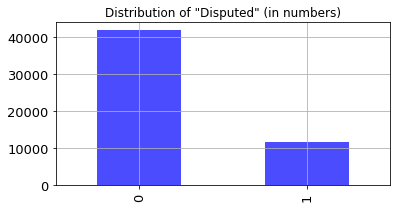

In [42]:
plt.figure()
GD_train_Text.Disputed.value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Distribution of "Disputed" (in numbers)')
plt.grid()
plt.show()

## Extracting first 100 rows for test

In [43]:
GD_train_100=GD_train_Text[:1000]

In [44]:
GD_train_100.Disputed.value_counts()

0    726
1    274
Name: Disputed, dtype: int64

## defining function to preprocess description
## Going ahead with stopword removal

In [45]:
# Extracting words alone
def GD_to_words( raw_review ):
        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review)) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                   
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join(meaningful_words)) 

In [46]:
GD_train_Text_1 = GD_train_100
GD_train_Text_1.shape

(1000, 2)

## Number of Greviences 

In [47]:
# Get number of reviews
Gri_Des = GD_train_Text_1["GrievanceDescription"].size

print(Gri_Des)

1000


## Fuction with multiple regular expression conditions to remove strings of "X"

In [48]:
def rem_Xword_MulReg( raw_data ):
    raw_data_1 = re.sub(r'\bxxxx\b\s+|\bxxx\b\s+|\bxx\b\s+|\bxxxx|\bxxx|\bxx|xxxx\b|xxx\b|xx\b',"",raw_data)
    return(raw_data_1)

## Final function for clean grev, trying with just 100 rows

# Function desc - For loop loops through every value in the column
Line 1 - extracts only the text values from the string
Line 2 - Calls to functionto remove "X"values
Line 3 - USeing textblob for spell check and converting text blob into a string
Line 4 - appending to the list

In [49]:
# removing x, and spell check No segmentation
clean_Grev = []

for i in range( 0, Gri_Des ):
    str1 = GD_to_words( GD_train_Text_1["GrievanceDescription"][i] )
    str2 = rem_Xword_MulReg(str1)
    str3 = str(TextBlob(str2).correct())
    clean_Grev.append(str3)
    
print(clean_Grev[1])

mortgage never missed payment financed citizens mortgage obtain loan completely renovate home home built current mortgage house single family ocean view car garage additional parking spot late moved started financing process citizens lower monthly payment close would longer need mi insurance provided citizens every document asked sap signed allow income taxes released paid appraisal home occurred appraisal came significantly market value raised complaints appraisal loan originator citizens bank agreed way value would file complaint loan fine even though appraisal artificially low told would close end close told would close end along available via email told loan going forward set told via email would close monday moved told phone around closing tomorrow received email saying loan denied also said email sore throat cold talk reason stated amount summer job less told safe cancel payment via telephone planned financially child wife working need come additional money told would need citize

## TF-IDF Matrix

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, smooth_idf=True, tokenizer=None)

sklearn_representation = sklearn_tfidf.fit_transform(clean_Grev)
print(sklearn_representation)

  (0, 492)	0.16197542097290513
  (0, 4408)	0.13874744818898507
  (0, 337)	0.1903363787518005
  (0, 709)	0.10270258614367232
  (0, 3392)	0.1824711305919906
  (0, 1279)	0.07685123217566374
  (0, 3074)	0.10675485397475297
  (0, 2089)	0.11527729335750704
  (0, 2524)	0.06798000261019456
  (0, 3441)	0.07513794642216885
  (0, 2269)	0.18229596491648262
  (0, 2674)	0.11657747926809309
  (0, 1168)	0.12790980608702604
  (0, 4982)	0.17086452329045682
  (0, 2404)	0.14535426795172887
  (0, 910)	0.10853706543277522
  (0, 4781)	0.10853706543277522
  (0, 1888)	0.13107722462484106
  (0, 3661)	0.06335602883300576
  (0, 4195)	0.055390046351585634
  (0, 842)	0.08587241179490926
  (0, 243)	0.07093771561076688
  (0, 1302)	0.11794111346216017
  (0, 1839)	0.4060523572634565
  (0, 2570)	0.08214034866161328
  :	:
  (999, 1611)	0.06238583274564635
  (999, 2868)	0.05745780285257176
  (999, 4647)	0.06465753073200402
  (999, 43)	0.04961101161730389
  (999, 4782)	0.061400818120355284
  (999, 2983)	0.06346479419062578

In [51]:
# Numpy arrays are easy to work with, so convert the result to an array
data_features = sklearn_representation.toarray()
print(data_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
data_features=pd.DataFrame(data_features)
print(data_features)
print(data_features.columns.values)

     0     1     2     3     4     5         6     7        8         9     \
0     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
1     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
2     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.041036   
3     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
4     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
5     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
6     0.0   0.0   0.0   0.0   0.0   0.0  0.093186   0.0  0.00000  0.041405   
7     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
8     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
9     0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
10    0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000  0.000000   
11    0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.00000

In [53]:
data_features["Disputed"]=GD_train_Text_1["Disputed"]

In [54]:
data_features = data_features.sample(frac=1)
print(data_features)

       0         1    2    3    4    5    6    7    8         9    ...     \
232  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.043496    ...      
48   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
728  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
389  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
441  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
285  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
416  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
725  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
378  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
413  0.0  0.123666  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      
46   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.050413    ...      
337  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    ...      

In [55]:
### Splitting data into train & test

train,test = train_test_split(data_features, test_size = 0.2) 

cols = [col for col in data_features.columns if col not in ["Disputed"]]

train.x= train[cols]
train.y=train["Disputed"]

test.x=test[cols]
test.y=test["Disputed"]

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## Buildilng logistic regression model

In [56]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train.x,train.y)
y_pred=logreg.predict(test.x)

print('Accuracy of logistic regression classifier on test set:',logreg.score(test.x, test.y))


from sklearn.metrics import classification_report
print(classification_report(test.y, y_pred))


Accuracy of logistic regression classifier on test set: 0.715
             precision    recall  f1-score   support

          0       0.71      1.00      0.83       143
          1       0.00      0.00      0.00        57

avg / total       0.51      0.71      0.60       200



C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



### _Cross Validation for Logistic Regression Model_

In [57]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=15, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train.x, train.y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: ", (results.mean()))

#preds1 = model_rbf.predict(test.x)
#confusion_matrix(test.y.astype(int),preds1)

10-fold cross validation average accuracy:  0.731143722338691


### _Building Naive Bayes Model_

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train.x, train.y).predict(test.x)
confusion_matrix(test.y,y_pred)

array([[121,  22],
       [ 29,  28]], dtype=int64)

In [59]:
accuracy_nb = metrics.accuracy_score(test.y, y_pred)
print(accuracy_nb)

0.745
